# Adatvizualizáció 

- **pandas** - adatelemző könyvtár - https://pandas.pydata.org/docs/
- **matplotlib** - adatvizualizációs könyvtár - https://matplotlib.org/stable/
- **seaborn** - adatvizualizációs könyvtár - https://seaborn.pydata.org/
- **plotly** - interkatív adatvizualizációs könyvtár - https://plotly.com/python/
- **altair** - deklaratív adatvizualizációs könyvtár - https://altair-viz.github.io/
- **bokeh** - adatvizualizációs könyvtár - https://bokeh.org/

## 1. Pandas könyvtár segítségével

Annak ellenére, hogy nem elsődleges feladata, a Pandas könyvtár is képes alapvető vizualizációk elkészítésére. A diagramok készítése Matpltlib könyvtáron alapul, rajzoláshoz szükséges adatok megadása hasonló.

<b>Az elérhető diagramtípusok:</b>
- ‘bar’ vagy ‘barh’ - oszlop és sávdiagram
- ‘hist’ - hisztogram
- ‘box’ - dobozdiagram
- ‘kde’ vagy ‘density’ - sűrűségdiagram
- ‘area’ - terület diagram
- ‘scatter’ - pont XY diagram
- ‘hexbin’ - hatszögletű sűrűségdiagram
- ‘pie’ - kördiagram

A megfelelő diagram kiválasztása <code>.plot(kind="")</code> paranccsal történik.

## Könyvtár telepítése és importálása

In [145]:
# %pip install pandas

In [146]:
import pandas as pd

## Adatok megadása

In [147]:
x = {
    "Hőmérséklet éjszaka": [8, 12, 16, 15, 12, 9, 11, 13, 13],
    "Hőmérséklet nappal": [16, 22, 27, 29, 17, 14, 19, 21, 22],
}
y = [1, 2, 3, 4, 5, 6, 7, 8, 9]

## Dataframe és diagram létrehozása

Először elkészítjük az adathalmazt a program számára.

In [148]:
df = pd.DataFrame(x, y)

print(df)

df.head()

   Hőmérséklet éjszaka  Hőmérséklet nappal
1                    8                  16
2                   12                  22
3                   16                  27
4                   15                  29
5                   12                  17
6                    9                  14
7                   11                  19
8                   13                  21
9                   13                  22


Hőmérséklet éjszaka  Hőmérséklet nappal
1                    8                  16
2                   12                  22
3                   16                  27
4                   15                  29
5                   12                  17

A diagram megrajzolására több lehetőségünk is van. Vagy paraméterként megadjuk a típusát a <code>kind=""</code> formában a <code>df.plot()</code> utasításnál, vagy direkt célzottan hívjuk meg a függvényt <code>df.plot.bar()</code>.

<Axes: >

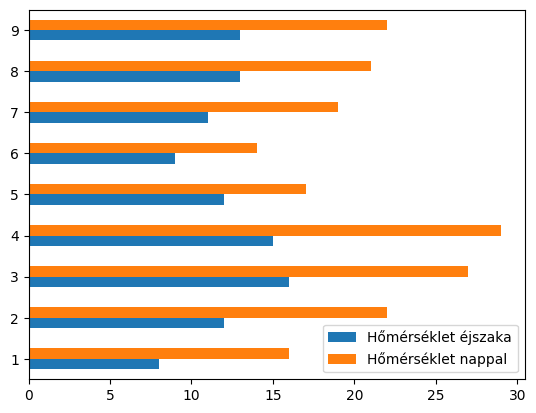

In [149]:
df.plot(kind="barh")

Adhatunk hozzá címet a <code>title=""</code> paraméter megadásával.

<Axes: title={'center': 'Időjárás előrejelzés'}>

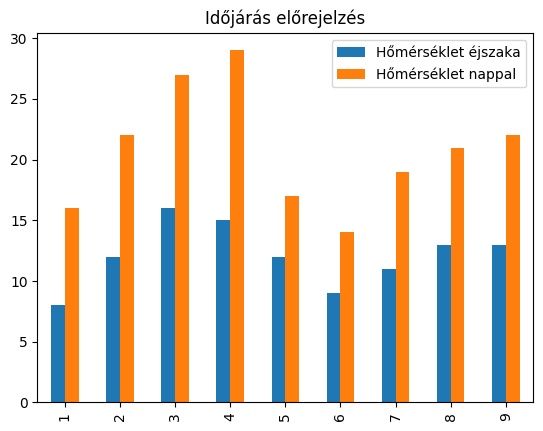

In [150]:
df.plot.bar(title="Időjárás előrejelzés")

## Vonaldiagram 

A diagram megjelenésének, fő részeinek meghatározása paramétereken (pl.: <code>kind</code>, <code>grid</code>, <code>title</code>, stb.) kereszül történik.

<b>Néhány fontosabb:</b>
- figsize - ábra mérete
- title - cím
- grid - rácsvonal
- legend - jelmagyarázat
- xticks/yticks - x/y tengelyeken használt értékek
- xlim/ylim - x/y tengelyek limitálása
- xlabel/ylabel - x/y tengely elnevezése

Bővebben: <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html>pandas.DataFrame.plot</a>

<Axes: title={'center': 'Időjárás előrejelzés'}, xlabel='Napok', ylabel='Hőmérséklet (°C)'>

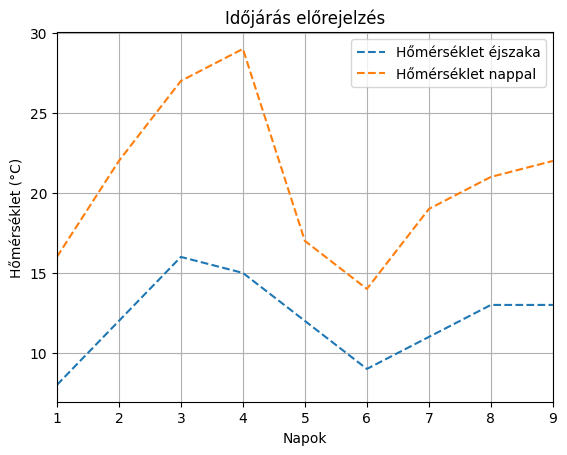

In [151]:
df.plot(
    kind="line",
    grid=True,
    title="Időjárás előrejelzés",
    ylabel="Hőmérséklet (°C)",
    xlabel="Napok",
    xlim=(1, 9),
    ls="dashed",
)

## 2. Plotly Express

## Adatok létrehozása

In [152]:
df_2 = pd.DataFrame({
    'éjszaka': [8, 12, 16, 15, 12, 9, 11, 13],
    'nappal': [16, 22, 27, 29, 17, 22, 27, 31]
})

df_2.head()

éjszaka  nappal
0        8      16
1       12      22
2       16      27
3       15      29
4       12      17

In [153]:
# %pip install plotly
import plotly.express as px

fig = px.line(df_2, y = df_2["éjszaka"],labels={"éjszaka": "Hőmérséklet (°C)", "index": "Nap"}, title='Hőmérséklet változása éjszaka')
display(fig)

## Adatok transzformálása a ```dataframe.melt()``` paranccsal 

Plotly másképp kezeli az adatokat, ezért megfelelő elrendezéshez transzformálni érdemes azokat.

**Eredeti:**   
|  -  | éjszaka |  nappal |
|-----|---------|---------|
|  1  |    8    |    16   |
|  2  |   12    |    22   |
|  3  |   16    |    27   |
|  4  |   15    |    29   |
|  5  |   12    |    17   |

**Új:**  
| day | temp |  type  |
|-----|------|--------|
|  1  |   8  |  éjjel |
|  1  |  16  | nappal |
|  2  |  12  |  éjjel |
|  2  |  22  | nappal |
|  3  |  16  |  éjjel |
|  3  |  27  | nappal |
|  4  |  15  |  éjjel |
|  4  |  29  | nappal |
|  5  |  12  |  éjjel |
|  5  |  17  | nappal |

In [154]:
df_melted = df_2.reset_index().melt(id_vars='index', var_name='type', value_name='temp')
df_melted.head(10)

index     type  temp
0      0  éjszaka     8
1      1  éjszaka    12
2      2  éjszaka    16
3      3  éjszaka    15
4      4  éjszaka    12
5      5  éjszaka     9
6      6  éjszaka    11
7      7  éjszaka    13
8      0   nappal    16
9      1   nappal    22

## Napokat tartalmazó oszlop létrehozása az index alapján

Az ```index``` oszlop egyetlen hibája, hogy 0-tól kezd számolni, ezt korrigáljuk. Ezek után az ```index``` szükségtelen és eltávolításra kerül. Új oszlop létrehozása hasonló az egyszerű értékadáshoz, oszlop eltávolítása a ```drop()``` paranccsal történik.

In [155]:
df_melted['day'] = df_melted['index'] + 1
df_melted = df_melted.drop(columns='index')

df_melted.head()

type  temp  day
0  éjszaka     8    1
1  éjszaka    12    2
2  éjszaka    16    3
3  éjszaka    15    4
4  éjszaka    12    5

## Oszlopok sorrendjének módosítása

In [156]:
df_melted = df_melted[['day', 'temp', 'type']]
df_melted.head()

day  temp     type
0    1     8  éjszaka
1    2    12  éjszaka
2    3    16  éjszaka
3    4    15  éjszaka
4    5    12  éjszaka

## Rendezés napok szerint

In [157]:
df_melted_sorted = df_melted.sort_values(by=['day']).reset_index(drop=True)
df_melted_sorted.head(20)

day  temp     type
0     1     8  éjszaka
1     1    16   nappal
2     2    12  éjszaka
3     2    22   nappal
4     3    16  éjszaka
5     3    27   nappal
6     4    15  éjszaka
7     4    29   nappal
8     5    12  éjszaka
9     5    17   nappal
10    6     9  éjszaka
11    6    22   nappal
12    7    11  éjszaka
13    7    27   nappal
14    8    13  éjszaka
15    8    31   nappal

## Adatok megjelenítése és néhány főbb paraméter

In [158]:
fig = px.line(df_melted_sorted,
              x = df_melted_sorted["day"],
              y = df_melted_sorted["temp"],
              range_y = [0,30],
              labels={"temp": "Hőmérséklet (°C)", "day": "Nap"},
              title = "Hőmérséklet változása",
              color = df_melted_sorted["type"])
display(fig)